# 模板匹配

# 1. 模板匹配简介

① 模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖的地方）的差别程度(例如值127与值190的区别)，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。

② 假如原图形是AxB大小，而模板是axb大小，则输出结果的矩阵是(A-a+1)x(B-b+1)。

③ 模板匹配计算方式6种方式 ( 用归一化后的方式更好一些 )：

- TM_SQDIFF：计算平方不同，计算出来的值越小，越相关。        
- TM_CCORR：计算相关性，计算出来的值越大，越相关。
- TM_CCOEFF：计算相关系数，计算出来的值越大，越相关。
- TM_SQDIFF_NORMED：计算归一化平方不同，计算出来的值越接近0，越相关。
- TM_CCORR_NORMED：计算归一化相关性，计算出来的值越接近1，越相关。
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近1，越相关。

④ 公式：https://docs.opencv.org/3.3.1/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d

# 2. 模板匹配单个对象

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

# 魔法指令，直接展示图，Jupyter notebook特有
%matplotlib inline  

template = cv2.imread('01_Picture/12_Face.jpg',0)  # 0 表示以灰度图方式读取
img = cv2.imread('01_Picture/13_Lena.jpg',0) 
h, w = template.shape[:2] # 获得模板的宽和高
print(img.shape)
print(template.shape)

(263, 263)
(110, 85)


In [2]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']
res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
print(res.shape) # 返回的矩阵大小 (A-a+1)x(B-b+1)
min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) # 返回模板匹配后最小值、最大值的位置   
print(min_val) # cv2.TM_SQDIFF方法中，越小的值表示像素点的差异越小
print(max_val)
print(min_loc) # 当获得最小值对应的模板左上角的位置，加上模板自身的长、宽，可以在原图像中画出最匹配的区域
print(max_loc)

(154, 179)
39168.0
74403584.0
(107, 89)
(159, 62)


4


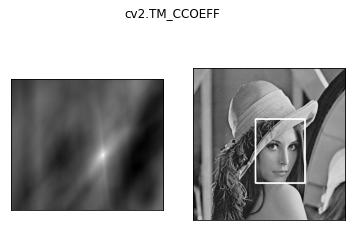

5


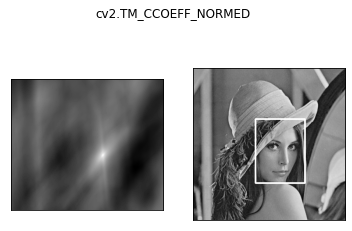

2


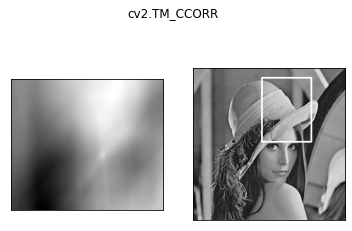

3


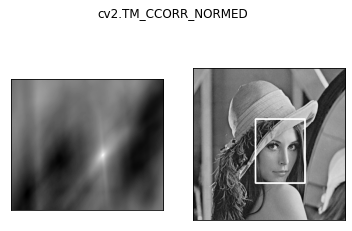

0


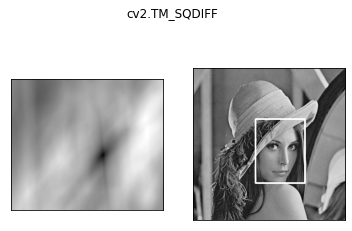

1


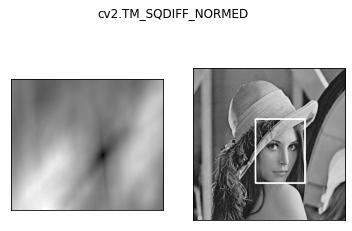

In [3]:
for meth in methods:
    img2 = img.copy()
    # 匹配方法的真值
    method = eval(meth) # 提取字符串中的内容，不能用字符串的形式
    print(method)
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差匹配 TM_SQDIFF 或归一化平方差匹配 TM_SQDIFF_NORMED,取最小值
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0]+w,top_left[1]+h)
    
    # 画矩形
    cv2.rectangle(img2,top_left,bottom_right,255,2)
    
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([]) # 隐藏坐标轴
    plt.subplot(122),plt.imshow(img2,cmap='gray')
    plt.xticks([]),plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# 3. 模板匹配多个对象

In [4]:
img_rgb = cv2.imread('01_Picture/14_Mario.jpg')
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
print('img_gray.shape：',img_gray.shape)
template = cv2.imread('01_Picture/15_Mario_coin.jpg',0)
print('template.shape：',template.shape)
h, w = template.shape[:2]

# res 是 result 的简称
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) # res 是返回每一个小块窗口得到的结果值
print('res.shape：',res.shape)
threshold = 0.8

# 取匹配程度大于 80% 的坐标
loc = np.where(res >= threshold) # np.where 使得返回 res 矩阵中值大于 0.8 的索引，即坐标
print('type(loc):',type(loc)) # loc 为元组类型
print('len(loc):',len(loc))  # loc 元组有两个值
print('len(loc[0]):',len(loc[0]),'len(loc[1]):',len(loc[1]))   # loc 元组每个值 120 个元素
print('type(loc[0]):',type(loc[0]),'type(loc[1]):',type(loc[1])) # loc 元组每个值的类型为 numpy.array 
print("loc[::-1]：",loc[::-1]) # loc[::-1] 表示顺序取反，即第二个 numpy.array 放在第一个 numpy.array 前面     

i = 0
# zip函数为打包为元组的列表，例 a = [1,2,3] b = [4,5,6] zip(a,b) 为 [(1, 4), (2, 5), (3, 6)]    
for pt in zip(*loc[::-1]): # 当用 *b 作为传入参数时, b 可以为列表、元组、集合，zip使得元组中两个 numpy.array 进行配对   
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0,0,255),2)
    i = i + 1
print('i:',i)

cv2.imshow('img_rgb',img_rgb)
cv2.waitKey(0)

img_gray.shape： (207, 225)
template.shape： (27, 16)
res.shape： (181, 210)
type(loc): <class 'tuple'>
len(loc): 2
len(loc[0]): 120 len(loc[1]): 120
type(loc[0]): <class 'numpy.ndarray'> type(loc[1]): <class 'numpy.ndarray'>
loc[::-1]： (array([ 69,  70,  83,  84,  97,  98, 111, 112, 125, 126,  68,  69,  70,
        82,  83,  84,  96,  97,  98, 110, 111, 112, 124, 125, 126,  68,
        69,  70,  82,  83,  84,  96,  97,  98, 110, 111, 112, 125, 126,
        69,  83,  97, 111, 125,  54,  55,  69,  83,  84,  97,  98, 111,
       112, 125, 126, 139, 140,  54,  55,  56,  68,  69,  70,  82,  83,
        84,  96,  97,  98, 110, 111, 112, 124, 125, 126, 138, 139, 140,
        54,  55,  56,  68,  69,  70,  82,  83,  84,  96,  97,  98, 110,
       111, 112, 124, 125, 126, 139, 140,  55,  69,  83,  97, 111, 125,
       139,  55,  55,  69,  83,  97, 111, 125, 139,  55,  69,  83,  97,
       111, 125, 139], dtype=int64), array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  41,  41,  41,
        

-1